### Imports

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier

### EDA

In [33]:
df = pd.read_csv('/Users/balajivijayaraj/Desktop/British_Airways/Task_2/customer_booking.csv', encoding='ISO-8859-1')

In [34]:
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [36]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [37]:
# Removing columns that has lot of distinct values. we cant one hot encode that, because it improves the complexity of the model with 1000+ features
df_cleaned = df.drop(['route', 'booking_origin'], axis=1)


In [38]:
df_cleaned.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,1,0,1,5.52,0


### One-Hot Encoding

In [40]:
# One-hot encoding on the 'flight_day' and 'trip_type' columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['flight_day', 'trip_type', 'sales_channel'], drop_first=False)

# Convert all boolean columns (if any) to 1s and 0s
df_cleaned = df_cleaned.astype(int)



### Correlation check

                        num_passengers  purchase_lead  length_of_stay  \
num_passengers                1.000000       0.212606       -0.115850   
purchase_lead                 0.212606       1.000000       -0.076560   
length_of_stay               -0.115850      -0.076560        1.000000   
flight_hour                   0.015607       0.035973       -0.024872   
wants_extra_baggage           0.120404      -0.022207        0.176757   
wants_preferred_seat          0.028544      -0.004499        0.032264   
wants_in_flight_meals         0.022943      -0.022653        0.098828   
flight_duration              -0.052298       0.073636        0.121764   
booking_complete              0.024116      -0.022131       -0.042408   
flight_day_Fri               -0.013208      -0.048024        0.003196   
flight_day_Mon                0.002169       0.045268       -0.006139   
flight_day_Sat                0.008485       0.003071        0.000878   
flight_day_Sun                0.023992       0.1072

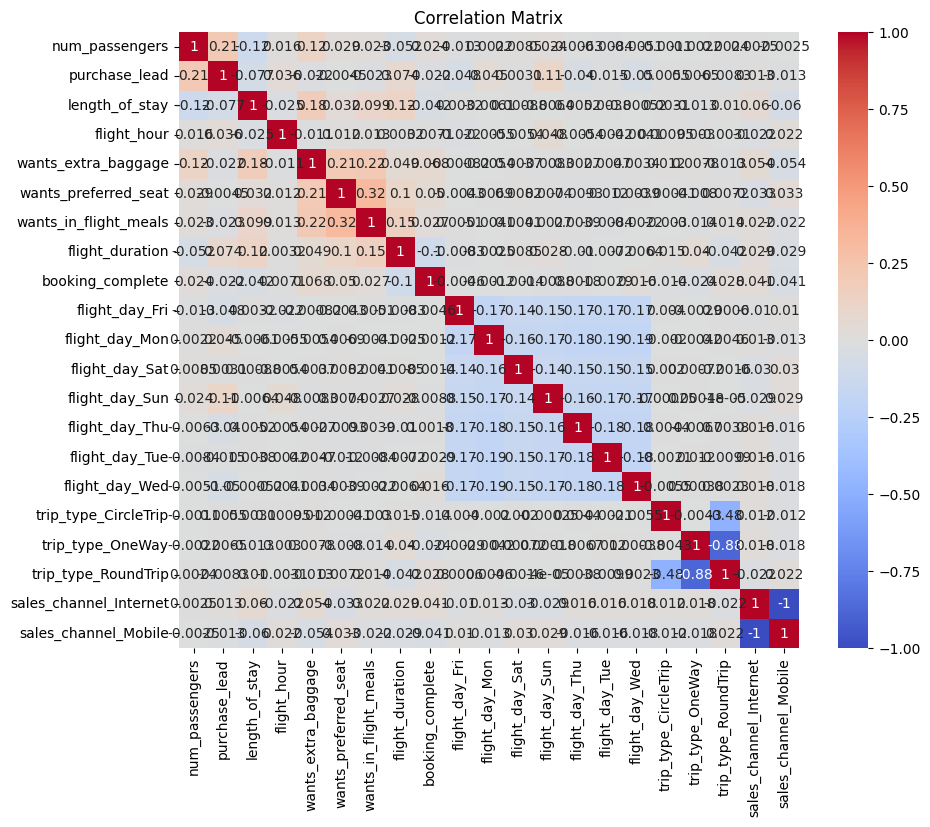

In [41]:

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

print(correlation_matrix)

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Conclusion**:
Overall, the weak correlations between most features and the target variable indicate that no single feature strongly influences whether a booking is completed, and the model will likely need to rely on interactions between multiple variables.
Additionally, since there are no strong multicollinearity issues among the features, they can generally be kept in the model without immediate concerns about redundancy.

### Outlier Detection

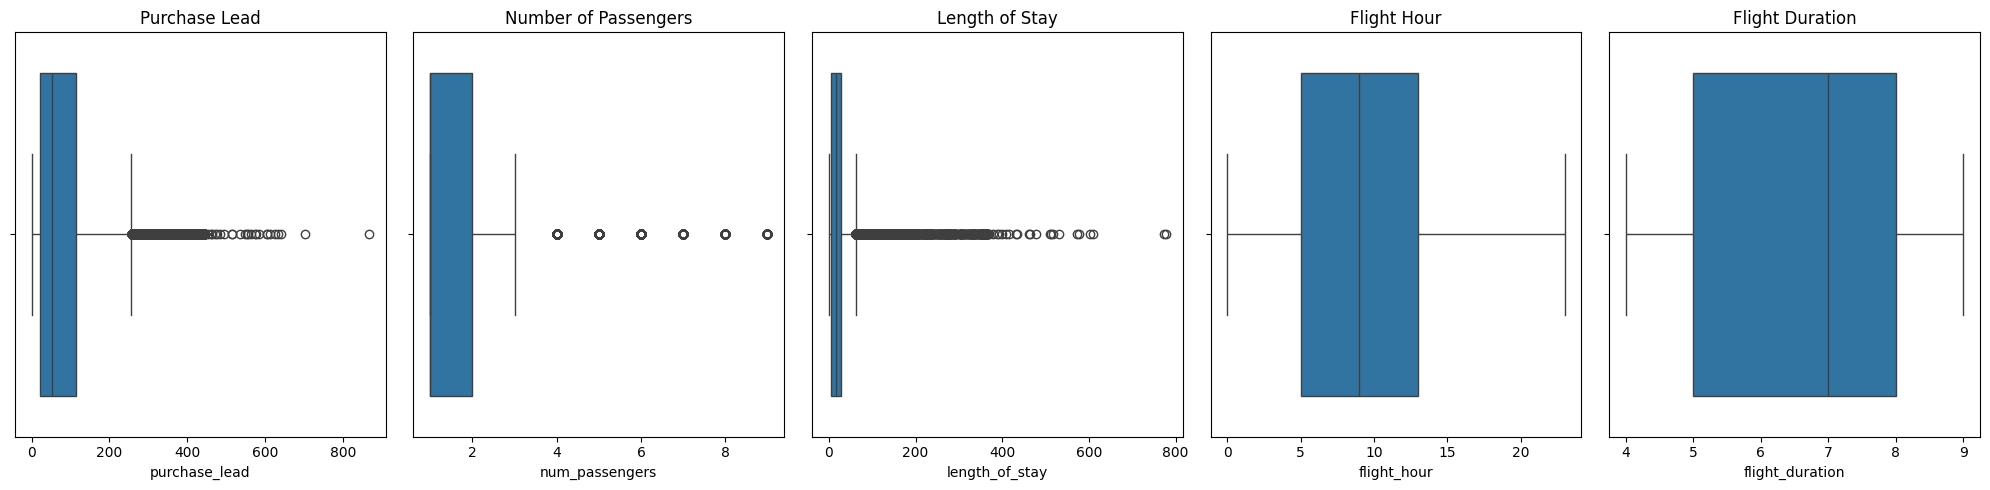

In [48]:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Create the boxplot for 'purchase_lead'
sns.boxplot(x=df_cleaned['purchase_lead'], ax=axes[0])
axes[0].set_title('Purchase Lead')

sns.boxplot(x=df_cleaned['num_passengers'], ax=axes[1])
axes[1].set_title('Number of Passengers')

sns.boxplot(x=df_cleaned['length_of_stay'], ax=axes[2])
axes[2].set_title('Length of Stay')

sns.boxplot(x=df_cleaned['flight_hour'], ax=axes[3])
axes[3].set_title('Flight Hour')

sns.boxplot(x=df_cleaned['flight_duration'], ax=axes[4])
axes[4].set_title('Flight Duration')

# Display the plot
plt.tight_layout()
plt.show()


In [42]:
# Because the features are weakely correlated i used univariate outlier detection. . i need to detect outliers because XGBoost is sensitive to outliers
# and random foreset is not that sensitive, but its better to detect to see if there is any pattern

In [53]:

# List of columns for which to remove outliers using z-scores
columns = ['purchase_lead', 'num_passengers', 'length_of_stay']

# Initialize a boolean array that starts as True for all rows
condition = np.ones(len(df_cleaned), dtype=bool)

# Iterate through the columns and update the condition to keep only rows where z-scores are <= 3
for col in columns:
    z_scores = np.abs((df_cleaned[col] - df_cleaned[col].mean()) / df_cleaned[col].std())
    condition &= (z_scores <= 3)  # Only keep rows where z-score <= 3 for all columns

# Apply the condition to filter the DataFrame
df_no_outliers = df_cleaned[condition]

print(f"Original shape: {df_cleaned.shape}")
print(f"New shape after removing outliers from all columns: {df_no_outliers.shape}")


Original shape: (50000, 21)
New shape after removing outliers from all columns: (47137, 21)


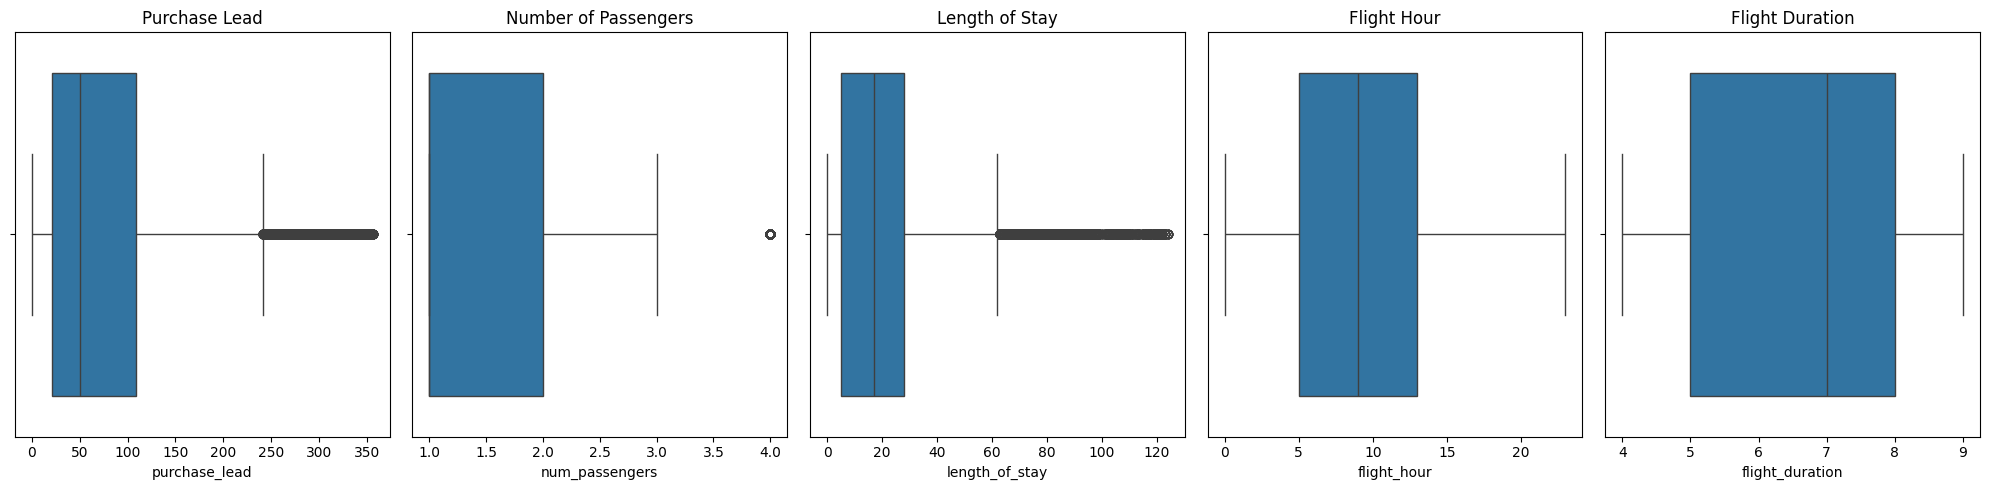

In [55]:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

sns.boxplot(x=df_no_outliers['purchase_lead'], ax=axes[0])
axes[0].set_title('Purchase Lead')

sns.boxplot(x=df_no_outliers['num_passengers'], ax=axes[1])
axes[1].set_title('Number of Passengers')

sns.boxplot(x=df_no_outliers['length_of_stay'], ax=axes[2])
axes[2].set_title('Length of Stay')

sns.boxplot(x=df_no_outliers['flight_hour'], ax=axes[3])
axes[3].set_title('Flight Hour')

sns.boxplot(x=df_no_outliers['flight_duration'], ax=axes[4])
axes[4].set_title('Flight Duration')

# Display the plot
plt.tight_layout()
plt.show()


In [28]:
# Always split the data first and then normalize the training and test sets separately using the parameters learned from the training data. 
# This ensures that the test set remains unseen during the training process, preventing data leakage.
# normalising is not needed for tree based model.

## Random Forest

In [58]:
# Separate features and target
X = df_no_outliers.drop('booking_complete', axis=1)
y = df_no_outliers['booking_complete']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Predict probabilities for ROC-AUC calculation
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      8000
           1       0.35      0.06      0.10      1428

    accuracy                           0.84      9428
   macro avg       0.60      0.52      0.50      9428
weighted avg       0.78      0.84      0.79      9428

ROC-AUC: 0.6414265143557425



### Model Performance Summary:

- The model is very good at predicting **incomplete bookings (class 0)**, with **high precision (85%)** and **very high recall (98%)**.
- However, the model struggles significantly with **complete bookings (class 1)**, with **low precision (36%)** and **very low recall (6%)**. This means it misses most of the complete bookings.
- **Overall accuracy (84%)** looks good, but it is mostly because the model is very good at predicting the majority class (incomplete bookings).
- The **ROC-AUC score (0.64)** shows that the model is not great at distinguishing between complete and incomplete bookings.

---

### Bias and Prediction Behavior:

- The model is **biased towards predicting "no booking" (class 0)**, which means it prefers to predict that a person will not complete a booking, even in cases where they might. This is typical behavior in models trained on **imbalanced data**.
- Since the model performs poorly in predicting **complete bookings (class 1)**, there’s a high chance it **underestimates booking intentions**, especially when there’s some uncertainty or an "outside chance" of a person completing the booking.

---


#### Feature Importance

                   Feature  Importance
1            purchase_lead    0.327080
3              flight_hour    0.221096
2           length_of_stay    0.181876
7          flight_duration    0.071363
0           num_passengers    0.051298
6    wants_in_flight_meals    0.021628
5     wants_preferred_seat    0.016238
4      wants_extra_baggage    0.014160
13          flight_day_Tue    0.012743
9           flight_day_Mon    0.012674
12          flight_day_Thu    0.012508
14          flight_day_Wed    0.012429
10          flight_day_Sat    0.012084
8           flight_day_Fri    0.011902
11          flight_day_Sun    0.011505
19    sales_channel_Mobile    0.003755
18  sales_channel_Internet    0.003445
17     trip_type_RoundTrip    0.001126
16        trip_type_OneWay    0.000746
15    trip_type_CircleTrip    0.000346


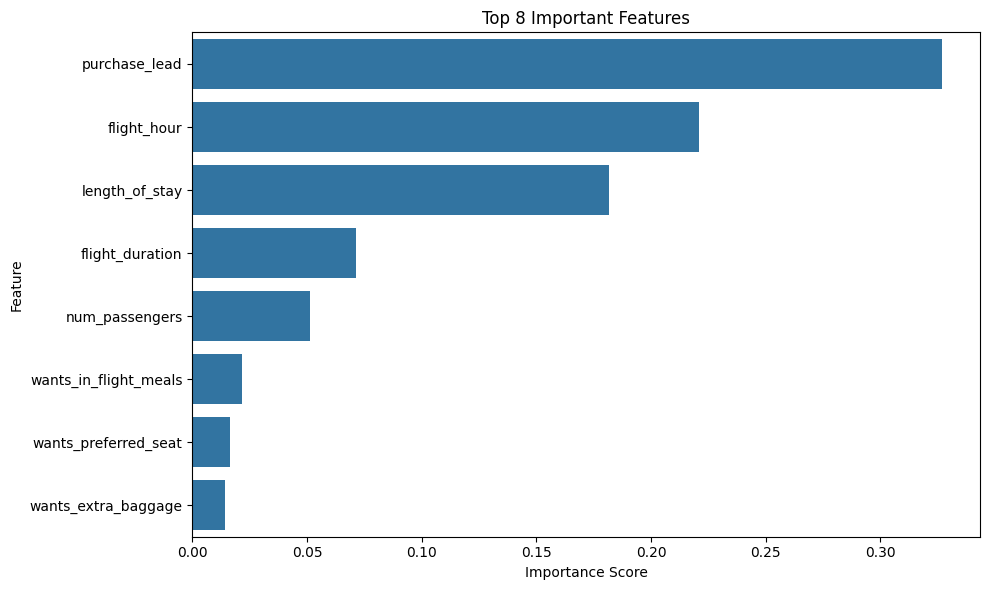

In [73]:


# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(8))  # Top 8 features
plt.title('Top 8 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


#### Cross Validation

In [7]:

# Separate features and target
X = df_no_outliers.drop('booking_complete', axis=1)  # Features
y = df_no_outliers['booking_complete']               # Target variable

# Step 1: Split the data into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Step 3: Use GridSearchCV with 5-fold cross-validation on the training set
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to your training data (cross-validation happens internally)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Step 4: Use the best model found to predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Step 5: Evaluate the model on the test set
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END max_depth=10, min_s

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  20.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  17.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; tot

## SAMPLING

#### SMOTE

In [62]:
# SMOTE (Synthetic Minority Oversampling Technique) generates synthetic samples for the minority class
# to balance the dataset, helping improve model performance on imbalanced classification tasks.


In [8]:

# Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [11]:
# Initialize the Random Forest model
rf_model_resampled = RandomForestClassifier(random_state=42, class_weight='balanced')



In [12]:
# Perform GridSearchCV on the resampled data
grid_search_resampled = GridSearchCV(estimator=rf_model_resampled, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_resampled.fit(X_resampled, y_resampled)

print("Best Hyperparameters after SMOTE:", grid_search_resampled.best_params_)

# Predict using the best model on the original test set
y_pred_smote = grid_search_resampled.best_estimator_.predict(X_test)

# Evaluate the model
print("Classification Report after SMOTE:")
print(classification_report(y_test, y_pred_smote))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.8s
[CV] END max_depth=10, min_s

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  19.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  45.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  18.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  45.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  17.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  17.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total

The **SMOTE**-enhanced model achieved an overall accuracy of **82%**, with strong performance for class `0` (incomplete bookings) showing **high recall (95%)** and **precision (86%)**. However, the model struggles with class `1` (complete bookings), showing **low precision (26%)** and **recall (11%)**, indicating difficulty in correctly identifying the minority class despite SMOTE's balancing. The **weighted average F1-score** of **0.79** reflects good overall performance but emphasizes the imbalance in identifying the minority class.

#### Undersampling

In [63]:
# Undersampling reduces the number of majority class samples to balance the dataset.
# This helps prevent the model from being biased toward the majority class in imbalanced classification tasks.


In [13]:

# Perform undersampling on the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_train, y_train)


In [19]:
# Train the Random Forest model on the undersampled data
grid_search_resampled_under = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_resampled_under.fit(X_resampled_under, y_resampled_under)

print("Best Hyperparameters after Undersampling:", grid_search_resampled_under.best_params_)

# Predict using the best model on the original test set
y_pred_under = grid_search_resampled_under.best_estimator_.predict(X_test)

# Evaluate the model
print("Classification Report after Undersampling:")
print(classification_report(y_test, y_pred_under))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=10, min_s

The **undersampling** approach resulted in an overall accuracy of **65%**, with a notable improvement in the performance on the minority class (`1` - complete bookings). The model achieved **recall of 60%** for class `1`, meaning it identifies a larger portion of complete bookings compared to SMOTE. However, the **precision for class `1` remains low (24%)**, leading to more false positives. Class `0` (incomplete bookings) has a **precision of 90%** but a lower recall (66%), reflecting the trade-off made to improve minority class performance.

#### SMOTEEN

In [64]:
# SMOTEENN combines SMOTE (oversampling the minority class) with ENN (removing noisy samples from the majority class).
# This hybrid method aims to balance the dataset while improving the model's ability to distinguish between classes.


In [20]:

# Combine SMOTE with ENN for both oversampling and undersampling
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN to the training data
X_resampled_smoteenn, y_resampled_smoteenn = smote_enn.fit_resample(X_train, y_train)


In [23]:
# Initialize the Random Forest model
rf_model_smoteenn = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV with 5-fold cross-validation on the resampled data
grid_search_smoteenn = GridSearchCV(estimator=rf_model_smoteenn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_smoteenn.fit(X_resampled_smoteenn, y_resampled_smoteenn)

# Best hyperparameters found
print("Best Hyperparameters after SMOTEENN:", grid_search_smoteenn.best_params_)

# Predict using the best model on the original test set
y_pred_smoteenn = grid_search_smoteenn.best_estimator_.predict(X_test)

# Evaluate the model
print("Classification Report after SMOTEENN:")
print(classification_report(y_test, y_pred_smoteenn))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.3s
[CV] END max_depth=10, min_s

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   4.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   9.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  24.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; to

The **SMOTEENN**-enhanced model achieved an overall accuracy of **70%**, offering a better balance between class `0` (incomplete bookings) and class `1` (complete bookings). For class `1`, the model improved its **recall to 45%**, capturing more complete bookings, though **precision remains low at 23%**. Class `0` maintains a solid **precision (89%)** and **recall (74%)**, reflecting a trade-off to boost minority class performance, with an overall weighted average F1-score of **0.73**.

#### SMOTETomek

In [65]:
# SMOTETomek combines SMOTE (oversampling the minority class) with Tomek links (removing overlapping samples between classes).
# This hybrid method balances the dataset by increasing minority class samples while cleaning ambiguous points between classes.


In [24]:

# Combine SMOTE with Tomek Links for both oversampling and undersampling
smote_tomek = SMOTETomek(random_state=42)

# Apply SMOTETomek to the training data
X_resampled_smotetomek, y_resampled_smotetomek = smote_tomek.fit_resample(X_train, y_train)


In [27]:
# Initialize the Random Forest model
rf_model_smotetomek = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform GridSearchCV with 5-fold cross-validation on the resampled data
grid_search_smotetomek = GridSearchCV(estimator=rf_model_smotetomek, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_smotetomek.fit(X_resampled_smotetomek, y_resampled_smotetomek)

# Best hyperparameters found
print("Best Hyperparameters after SMOTETomek:", grid_search_smotetomek.best_params_)

# Predict using the best model on the original test set
y_pred_smotetomek = grid_search_smotetomek.best_estimator_.predict(X_test)

# Evaluate the model
print("Classification Report after SMOTETomek:")
print(classification_report(y_test, y_pred_smotetomek))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.9s
[CV] END max_depth=10, min_s

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  43.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  17.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  17.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  43.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  43.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  16.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  16.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   6.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   7.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total 

The **SMOTETomek**-enhanced model achieved an overall accuracy of **82%**, with strong performance for class `0` (incomplete bookings) showing **high recall (95%)** and **precision (86%)**. However, the model struggled with class `1` (complete bookings), yielding **low precision (26%)** and **recall (10%)**, indicating difficulty in correctly identifying the minority class. Despite overall accuracy being high, the **weighted average F1-score of 0.79** reflects the model's bias toward the majority class.

## Fine-Tuning RandomForest with SMOTEENN

SMOTEENN: If your goal is to improve recall and F1-score for complete bookings (class 1), SMOTEENN is the better option. It sacrifices some accuracy but performs much better at identifying the minority class, making it more suitable for scenarios where detecting complete bookings is important.

In [28]:

# Combine SMOTE with ENN for both oversampling and undersampling
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN to the training data
X_resampled_smoteenn, y_resampled_smoteenn = smote_enn.fit_resample(X_train, y_train)

# Initialize the Random Forest model
rf_model_smoteenn = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define an expanded parameter grid for further fine-tuning
param_grid_fine_tune = {
    'n_estimators': [100, 300, 500, 800],       # Number of trees in the forest
    'max_depth': [10, 20, 30, None],            # Maximum depth of trees
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]      # Number of features to consider at each split
}

# Perform GridSearchCV with 5-fold cross-validation on the resampled data
grid_search_smoteenn_fine = GridSearchCV(estimator=rf_model_smoteenn, param_grid=param_grid_fine_tune, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the resampled training data
grid_search_smoteenn_fine.fit(X_resampled_smoteenn, y_resampled_smoteenn)

print("Best Hyperparameters after Fine-Tuning SMOTEENN:", grid_search_smoteenn_fine.best_params_)

# Predict using the best model on the original test set
y_pred_smoteenn_fine = grid_search_smoteenn_fine.best_estimator_.predict(X_test)

# Evaluate the model
print("Classification Report after Fine-Tuning SMOTEENN:")
print(classification_report(y_test, y_pred_smoteenn_fine))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  48.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  17.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  47.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  25.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  26.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  26.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  27.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.4s
[CV] END max_depth=20, max_features=sqr

After fine-tuning with **SMOTEENN**, the model achieved an overall accuracy of **69%**, showing a better balance between class `0` (incomplete bookings) and class `1` (complete bookings). The model improved **recall for class `1` to 44%**, capturing more complete bookings, although **precision remains low at 22%**. For class `0`, it maintained a solid **precision of 88%** and **recall of 73%**, with a **weighted average F1-score of 0.73**, reflecting a reasonable trade-off to improve minority class performance.

In [67]:
# Predict probabilities instead of labels
y_prob_smoteenn = grid_search_smoteenn_fine.best_estimator_.predict_proba(X_test)[:, 1]

thresholds = [0.3, 0.4, 0.45, 0.5]
for threshold in thresholds:
    y_pred_threshold = (y_prob_smoteenn >= threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))




Threshold: 0.3
              precision    recall  f1-score   support

           0       0.96      0.62      0.75      8000
           1       0.28      0.84      0.42      1428

    accuracy                           0.65      9428
   macro avg       0.62      0.73      0.59      9428
weighted avg       0.85      0.65      0.70      9428


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      8000
           1       0.33      0.80      0.46      1428

    accuracy                           0.72      9428
   macro avg       0.64      0.75      0.64      9428
weighted avg       0.86      0.72      0.76      9428


Threshold: 0.45
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      8000
           1       0.35      0.77      0.48      1428

    accuracy                           0.75      9428
   macro avg       0.65      0.76      0.66      9428
weighted avg       0.86  

### Choosing the Best Threshold:

The best threshold depends on your **business goal** and the **cost of misclassification**:

1. **If you prioritize recall** (capturing as many complete bookings as possible and minimizing false negatives), the **threshold of 0.4** or **0.45** is better. These thresholds give:
   - **High recall** (77%-80% for class `1`), meaning the model captures most of the complete bookings.
   - Acceptable **precision** (33%-35%), though it results in more false positives.

2. **If you prioritize precision** (ensuring that when the model predicts class `1`, it is more likely to be correct), the **threshold of 0.5** is better. This gives:
   - A balance between **precision (37%)** and **recall (75%)**.
   - Higher accuracy and fewer false positives.

---

### Recommendation:

- If your goal is to **identify as many complete bookings as possible** (favoring recall), I would lean toward **threshold 0.45**, as it provides a good balance with a decent recall for class `1` (77%) while maintaining reasonable precision.
  
- If **precision** is more important, go with **threshold 0.5** for a more balanced approach.


### ROC Curve

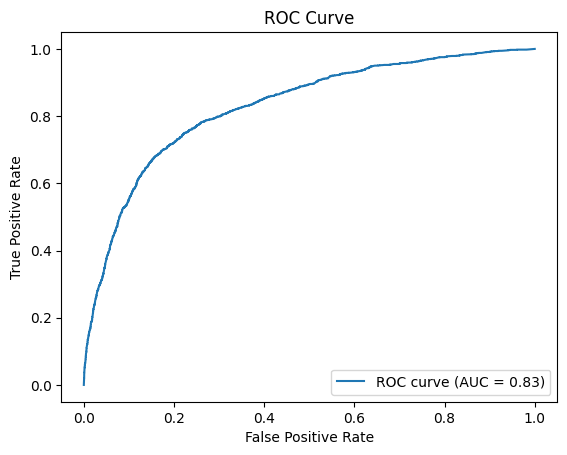

In [68]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob_smoteenn)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



### ROC Curve Analysis:

This **ROC curve** (Receiver Operating Characteristic curve) provides a visualization of the model's performance across different classification thresholds. Here’s what it tells us:

#### Key Insights:
1. **True Positive Rate (TPR)** vs. **False Positive Rate (FPR)**:
   - The **True Positive Rate (y-axis)** is also called **Recall** (i.e., the proportion of actual positive cases that were correctly identified by the model).
   - The **False Positive Rate (x-axis)** is the proportion of negative cases that were incorrectly classified as positive.
   - The curve shows the trade-off between these two metrics at various threshold levels.

2. **AUC (Area Under the Curve)**:
   - The **AUC score is 0.83**, which is a **good score**. An AUC of **1.0** represents a perfect model, while **0.5** represents a model that performs no better than random guessing.
   - **AUC = 0.83** means that there is an **83% chance** that the model will correctly distinguish between a positive class (complete booking) and a negative class (incomplete booking).

3. **Performance**:
   - The curve rises steeply in the beginning, indicating that the model does a good job of achieving high recall without a sharp increase in the false positive rate. However, the curve flattens out toward the right side, which shows that beyond a certain point, increasing recall leads to a much higher false positive rate.

---

#### Conclusion:
- **AUC = 0.83** indicates that the model is performing well in distinguishing between the two classes (complete vs. incomplete bookings), with a good balance between **True Positive Rate** and **False Positive Rate**.
- However, there’s still room for improvement, especially in reducing false positives as the curve approaches the top-right corner.

## XGBoost

In [70]:

# Initialize the XGBoost model without the 'use_label_encoder' parameter
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, eval_metric='logloss')

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 300, 500],        # Number of trees in the forest
    'max_depth': [3, 5, 10],                # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],      # Learning rate (shrinkage)
    'colsample_bytree': [0.3, 0.7, 1.0],    # Subsample ratio of columns when constructing each tree
    'subsample': [0.8, 1.0]                 # Subsample ratio of the training instances
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search_xgb.fit(X_train, y_train)

print("Best Hyperparameters for XGBoost:", grid_search_xgb.best_params_)

# Predict using the best model on the test set
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)

# Evaluate the model
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END 

The **XGBoost model** with the best hyperparameters achieved an overall accuracy of **80%**. For the majority class (`0` - incomplete bookings), the model shows strong performance with **precision of 86%** and **recall of 90%**. However, for the minority class (`1` - complete bookings), performance is lower, with **precision of 27%** and **recall of 20%**, indicating that the model struggles to correctly identify complete bookings. The **macro average F1-score** of **0.55** reflects the imbalance between the two classes, while the **weighted average F1-score** of **0.78** shows the model's overall performance, skewed toward the majority class.

<Figure size 1000x600 with 0 Axes>

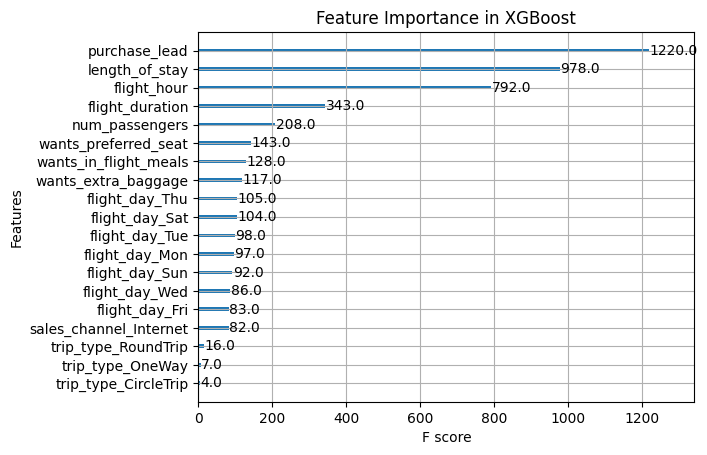

In [80]:
# Fit the XGBoost model if it hasn't been trained yet
xgb_model.fit(X_train, y_train)

# Now, plot the feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')  # You can also use 'gain' or 'cover'
plt.title('Feature Importance in XGBoost')
plt.show()


## Fine-Tuning XGBoost with SMOTEENN

In [72]:

# Combine SMOTE with ENN for both oversampling and undersampling
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN to the training data
X_resampled_smoteenn, y_resampled_smoteenn = smote_enn.fit_resample(X_train, y_train)

# Initialize the XGBoost model
xgb_model_smoteenn = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

# Define an expanded parameter grid for further fine-tuning
param_grid_xgb = {
    'n_estimators': [100, 300, 500, 800],             # Number of boosting rounds
    'max_depth': [3, 5, 10, 15],                     # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],           # Learning rate (eta)
    'colsample_bytree': [0.3, 0.7, 1.0],         # Subsample ratio of columns when constructing each tree
    'subsample': [0.8, 1.0]                      # Subsample ratio of the training instances
}

# Perform GridSearchCV with 5-fold cross-validation on the resampled data
grid_search_xgb_smoteenn = GridSearchCV(estimator=xgb_model_smoteenn, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the resampled training data
grid_search_xgb_smoteenn.fit(X_resampled_smoteenn, y_resampled_smoteenn)

# Best hyperparameters found
print("Best Hyperparameters for XGBoost after Fine-Tuning SMOTEENN:", grid_search_xgb_smoteenn.best_params_)

# Predict using the best model on the original test set
y_pred_xgb_smoteenn = grid_search_xgb_smoteenn.best_estimator_.predict(X_test)

# Evaluate the model
print("Classification Report for XGBoost after Fine-Tuning SMOTEENN:")
print(classification_report(y_test, y_pred_xgb_smoteenn))


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END

The **XGBoost model** with **SMOTEENN** achieved an overall accuracy of **64%**. For the majority class (`0` - incomplete bookings), the model performed well with **precision of 89%** and **recall of 66%**, indicating good accuracy in predicting incomplete bookings. For the minority class (`1` - complete bookings), the model achieved **recall of 52%**, meaning it captures over half of the actual complete bookings, but **precision remains low at 22%**, resulting in more false positives. The **macro average F1-score of 0.53** and the **weighted average F1-score of 0.69** reflect a performance skewed towards the majority class.

### **Class 0 (Incomplete Bookings)**:

#### **Precision**:
- **Definition**: Precision for class `0` is the proportion of bookings that the model predicted as incomplete (class `0`) that are actually incomplete.
- **Interpretation**: High precision here means that when the model predicts a booking as incomplete, it’s usually correct (fewer false positives for class `0`).

In your results:
- **XGBoost**: Precision for class `0` is **0.89**. This means **89%** of bookings predicted as incomplete are actually incomplete.
- **Random Forest**: Precision for class `0` is **0.88**.

**Implication**: Both models are performing well in identifying incomplete bookings, with high precision, meaning very few false positives (complete bookings misclassified as incomplete).

#### **Recall**:
- **Definition**: Recall for class `0` is the proportion of actual incomplete bookings that the model successfully identified.
- **Interpretation**: High recall for class `0` means the model correctly identifies most incomplete bookings.

In your results:
- **XGBoost**: Recall for class `0` is **0.66**, meaning it correctly identifies **66%** of incomplete bookings.
- **Random Forest**: Recall for class `0` is **0.73**, meaning it correctly identifies **73%** of incomplete bookings.

**Implication**: **Random Forest** has better recall for incomplete bookings, meaning it’s better at correctly identifying more incomplete bookings compared to **XGBoost**.


## Comparison between **XGBoost** and **Random Forest** after Fine-Tuning with **SMOTEENN**:

### **Analysis**:
1. **Accuracy**:
   - **Random Forest** has a higher accuracy (**69%**) compared to **XGBoost** (**64%**).
   
2. **Class 0 (Incomplete bookings)**:
   - **XGBoost** has a slightly better **precision (0.89)** compared to **Random Forest (0.88)**.
   - **Random Forest** has a higher **recall (0.73)** and a better **F1-score (0.80)** than **XGBoost (recall 0.66, F1-score 0.76)**.
   
3. **Class 1 (Complete bookings)**:
   - **XGBoost** has a higher **recall (0.52)** compared to **Random Forest (0.44)**, meaning it captures more of the complete bookings.
   - However, both models have similar **precision** for class `1` (both around **0.22**).
   - The **F1-scores** for class `1` are very close: **XGBoost (0.31)** and **Random Forest (0.30)**.

4. **Macro and Weighted Averages**:
   - The **macro average F1-scores** are close: **Random Forest (0.55)** slightly edges out **XGBoost (0.53)**.
   - **Random Forest** has a higher **weighted average F1-score (0.73)** compared to **XGBoost (0.69)**, indicating better overall performance, especially considering class imbalance.

---

### **Conclusion**:
- **Random Forest** provides slightly better overall performance in terms of accuracy (**69% vs. 64%**), better handling of the majority class (`0`), and a higher **weighted F1-score (0.73)**. It strikes a better balance between precision and recall across both classes.
  
- **XGBoost** performs better in terms of **recall** for the minority class (`1`), meaning it captures more complete bookings (**52% vs. 44%** for Random Forest), but the overall performance is lower, especially for the majority class (`0`).

---

### **Recommendation**:
- **Random Forest** is the better model in this comparison, especially if you're looking for overall higher accuracy and better performance across both classes. It has a more balanced approach, making it more reliable for general use.
  
- If you prioritize **recall for the minority class (class `1`)**, and capturing more complete bookings is more important, **XGBoost** might be preferred, though it sacrifices accuracy for this.


In [ ]:

# List of columns for which to remove outliers using z-scores
columns = ['purchase_lead', 'num_passengers', 'length_of_stay']

# Initialize a boolean array that starts as True for all rows
condition = np.ones(len(df_cleaned), dtype=bool)

# Iterate through the columns and update the condition to keep only rows where z-scores are <= 3
for col in columns:
    z_scores = np.abs((df_cleaned[col] - df_cleaned[col].mean()) / df_cleaned[col].std())
    condition &= (z_scores <= 3)  # Only keep rows where z-score <= 3 for all columns

# Apply the condition to filter the DataFrame
df_no_outliers = df_cleaned[condition]

print(f"Original shape: {df_cleaned.shape}")
print(f"New shape after removing outliers from all columns: {df_no_outliers.shape}")


Original shape: (50000, 21)
New shape after removing outliers from all columns: (47137, 21)
